# Outlier Detection

## How to Decompose Time Series Data into Trend and Seasonality

Taken from [Link](https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/)

Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.

Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.

In this tutorial, you will discover time series decomposition and how to automatically split a time series into its components with Python.

## Time Series Components

A useful abstraction for selecting forecasting methods is to break a time series down into systematic and unsystematic components.

- Systematic: Components of the time series that have consistency or recurrence and can be described and modeled.
- Non-Systematic: Components of the time series that cannot be directly modeled.

A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:

- Level: The average value in the series.
- Trend: The increasing or decreasing value in the series.
- Seasonality: The repeating short-term cycle in the series.
- Noise: The random variation in the series.

## Combining Time Series Components

A series is thought to be an aggregate or combination of these four components.

All series have a level and noise. The trend and seasonality components are optional.

It is helpful to think of the components as combining either additively or multiplicatively.

### Additive Model

An additive model suggests that the components are added together as follows:

$y(t) = Level + Trend + Seasonality + Noise$

An additive model is linear where changes over time are consistently made by the same amount.

A linear trend is a straight line.

A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).

### Multiplicative Model

A multiplicative model suggests that the components are multiplied together as follows:

$y(t) = Level * Trend * Seasonality * Noise$

A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time.

A nonlinear trend is a curved line.

A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.

## Decomposition as a Tool

This is a useful abstraction.

Decomposition is primarily used for time series analysis, and as an analysis tool it can be used to inform forecasting models on your problem.

It provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model.

Each of these components are something you may need to think about and address during data preparation, model selection, and model tuning. You may address it explicitly in terms of modeling the trend and subtracting it from your data, or implicitly by providing enough history for an algorithm to model a trend if it may exist.

You may or may not be able to cleanly or perfectly break down your specific time series as an additive or multiplicative model.

Real-world problems are messy and noisy. There may be additive and multiplicative components. There may be an increasing trend followed by a decreasing trend. There may be non-repeating cycles mixed in with the repeating seasonality components.

Nevertheless, these abstract models provide a simple framework that you can use to analyze your data and explore ways to think about and forecast your problem.

## Automatic Time Series Decomposition

There are methods to [automatically decompose](https://www.otexts.org/fpp/6/3) a time series.

The statsmodels library provides an implementation of the naive, or classical, decomposition method in a function called [seasonal_decompose()](http://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html). It requires that you specify whether the model is additive or multiplicative.

Both will produce a result and you must be careful to be critical when interpreting the result. A review of a plot of the time series and some summary statistics can often be a good start to get an idea of whether your time series problem looks additive or multiplicative.

The seasonal_decompose() function returns a result object. The result object contains arrays to access four pieces of data from the decomposition.

For example, the snippet below shows how to decompose a series into trend, seasonal, and residual components assuming an additive model.

The result object provides access to the trend and seasonal series as arrays. It also provides access to the residuals, which are the time series after the trend, and seasonal components are removed. Finally, the original or observed data is also stored.

    from statsmodels.tsa.seasonal import seasonal_decompose
    series = ...
    result = seasonal_decompose(series, model='additive')
    print(result.trend)
    print(result.seasonal)
    print(result.resid)
    print(result.observed)
    
Let’s look at some examples.

## Additive Decomposition

We can create a time series comprised of a linearly increasing trend from 1 to 99 and some random noise and decompose it as an additive model.

Because the time series was contrived and was provided as an array of numbers, we must specify the frequency of the observations (the freq=1 argument). If a Pandas Series object is provided, this argument is not required.

In [1]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
pyplot.show()

/usr/lib/python3/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


TypeError: seasonal_decompose() got an unexpected keyword argument 'period'

We can also see that the residual plot shows zero. This is a good example where the naive, or classical, decomposition was not able to separate the noise that we added from the linear trend.

The naive decomposition method is a simple one, and there are more advanced decompositions available, like Seasonal and Trend decomposition using [Loess or STL decomposition](https://www.otexts.org/fpp/6/5).

Caution and healthy skepticism is needed when using automated decomposition methods.

## Multiplicative Decomposition

We can contrive a quadratic time series as a square of the time step from 1 to 99, and then decompose it assuming a multiplicative model.

In [4]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(series, model='multiplicative', period=1)
result.plot()
pyplot.show()

ValueError: You must specify a freq or x must be a pandas object with a timeseries index witha freq not set to None

Exponential changes can be made linear by data transforms. In this case, a quadratic trend can be made linear by taking the square root. An exponential growth in seasonality may be made linear by taking the natural logarithm.

Again, it is important to treat decomposition as a potentially useful analysis tool, but to consider exploring the many different ways it could be applied for your problem, such as on data after it has been transformed or on residual model errors.

Let’s look at a real world dataset.

## Fill height of a water basin

First, let’s graph the raw observations.

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('rangesensor.dat', index_col=0, parse_dates=True, infer_datetime_format=True)
series['Height'].plot()
pyplot.show()

We will assume an additive model.

The example below decomposes the dataset as an additive model.

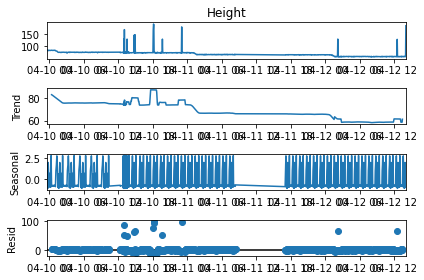

In [1]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = read_csv('rangesensor.dat', index_col=0, parse_dates=True, infer_datetime_format=True)
result = seasonal_decompose(series['Height'], model='additive', period=24)
result.plot()
pyplot.show()

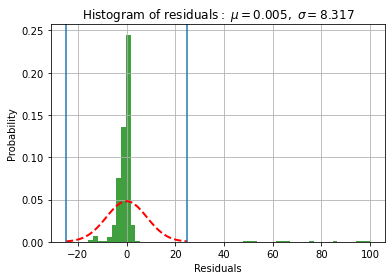

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

(mu, sigma) = norm.fit(result.resid.dropna())

# the histogram of the data
n, bins, patches = plt.hist(result.resid.dropna(), density = True, bins = 60, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = norm.pdf(np.linspace(-3*sigma,+3*sigma,num=100), mu, sigma)
l = plt.plot(np.linspace(-3*sigma,+3*sigma,num=100), y, 'r--', linewidth=2)

#plot
plt.xlabel('Residuals')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ residuals:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)
plt.axvline(3*sigma)
plt.axvline(-3*sigma)

plt.show()

## Anomaly Detection of Time Series Data

Info taken from [Link](https://medium.com/@jetnew/anomaly-detection-of-time-series-data-e0cb6b382e33)

### Holt-Winters (Triple Exponential Smoothing)

In [51]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fit = ExponentialSmoothing(series['Height'].values, seasonal_periods=24, trend='add', seasonal='add').fit(use_boxcox=True)
#fit.fittedvalues.plot(color='blue')
#fit.forecast(5).plot(color='green')
#plt.show()

### ARIMA (Auto-Regressive Integrated Moving Average)

ARIMA is a statistical model for time series data, capturing 3 key aspects of the temporal information — Auto-Regression(AR), Integration(I) and Moving Average(MA).

- Auto-Regression — Observations are regressed on its own lagged (i.e., prior) values.
- Integrated — Data values are replaced by the difference between values.
- Moving Average — Regression errors are dependent on lagged observations.

MSE: 461.512


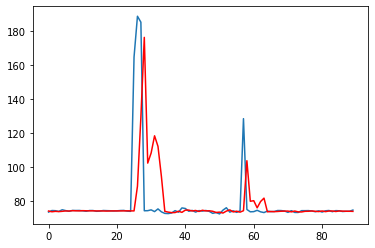

In [73]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

p = 5  # lag
d = 1  # difference order
q = 0  # size of moving average window

train, test = train_test_split(series['Height'].values, test_size=0.20, shuffle=False)
history = train.tolist()
predictions = []

for t in range(len(test)):
    model = ARIMA(history, order=(p,d,q))
    fit = model.fit(disp=False)
    pred = fit.forecast()[0]

    predictions.append(pred)
    history.append(test[t])
  
print('MSE: %.3f' % mean_squared_error(test, predictions))

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [111]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

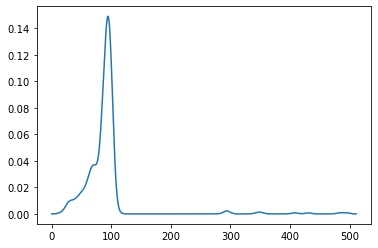

In [126]:
nobs = 300
np.random.seed(1234)  # Seed random generator
#dens = sm.nonparametric.KDEUnivariate(np.random.normal(size=nobs))
dens = sm.nonparametric.KDEUnivariate(data)
dens.fit(kernel='gau')
plt.plot(dens.density)
plt.show()